In [244]:
import imp
from operator import imod
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import env
import os
import acquire
import prepare
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings("ignore")


In [245]:
telco=acquire.get_telco_data()

In [246]:
telco.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,customer_id,contract_type_id,paperless_billing,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id.1,paperless_billing.1,monthly_charges,total_charges,churn,internet_service_type,payment_type
0,0,2,1,0002-ORFBO,2,Yes,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,2,Yes,65.6,593.3,No,DSL,Mailed check
1,1,2,1,0003-MKNFE,1,No,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,1,No,59.9,542.4,No,DSL,Mailed check
2,2,1,2,0004-TLHLJ,1,Yes,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,1,Yes,73.9,280.85,Yes,Fiber optic,Electronic check
3,3,1,2,0011-IGKFF,1,Yes,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,1,Yes,98.0,1237.85,Yes,Fiber optic,Electronic check
4,4,2,2,0013-EXCHZ,1,Yes,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,1,Yes,83.9,267.4,Yes,Fiber optic,Mailed check


In [247]:
telco=prepare.prep_telco(telco)

In [248]:
train, validate, test=prepare.my_train_test_split(train, 'churn')

In [249]:
train.head()

,paperless_billing,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing.1,monthly_charges,total_charges,churn,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3720,No,Female,0,No,No,47,Yes,No,74.45,3510.30,No,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1
1833,Yes,Female,0,No,No,6,Yes,Yes,91.10,455.30,Yes,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0
438,No,Male,0,Yes,Yes,72,Yes,No,21.00,1493.75,No,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
6936,Yes,Male,0,No,Yes,43,No,Yes,40.45,1912.85,No,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1908,No,Male,1,Yes,No,24,No,No,39.10,971.30,Yes,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [250]:
train['total_charges']=train['total_charges'].replace(' ', '')
train['monthly_charges']=train['monthly_charges'].replace(' ', '')

In [251]:
train['total_charges']=pd.to_numeric(train['total_charges'])
train['monthly_charges']=pd.to_numeric(train['monthly_charges'])

In [252]:
train.describe(include='all')

,paperless_billing,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing.1,monthly_charges,total_charges,churn,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,2535,2535,2535.000000,2535,2535,2535.000000,2535,2535,2535.000000,2531.000000,2535,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000
unique,2,2,NaN,2,2,NaN,2,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Yes,Male,NaN,No,No,NaN,Yes,Yes,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1518,1311,NaN,1292,1747,NaN,2301,1518,NaN,NaN,1862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.168442,NaN,NaN,31.836686,NaN,NaN,65.032761,2279.280680,NaN,0.482840,0.490335,0.310848,0.907692,0.598817,0.265483,0.092308,0.415779,0.213412,0.288757,0.213412,0.352268,0.213412,0.348718,0.213412,0.292308,0.213412,0.383826,0.213412,0.389349,0.440631,0.213412,0.215385,0.338462,0.228402
std,NaN,NaN,0.374332,NaN,NaN,24.432230,NaN,NaN,30.053020,2265.795838,NaN,0.499804,0.500005,0.462932,0.289517,0.490235,0.441677,0.289517,0.492953,0.409797,0.453274,0.409797,0.477771,0.409797,0.476659,0.409797,0.454913,0.409797,0.486412,0.409797,0.487699,0.496561,0.409797,0.411170,0.473280,0.419886
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,18.250000,18.850000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,NaN,NaN,8.000000,NaN,NaN,38.375000,399.950000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,NaN,NaN,28.000000,NaN,NaN,70.400000,1372.900000,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,NaN,NaN,54.000000,NaN,NaN,90.050000,3882.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [253]:
train.value_counts

<bound method DataFrame.value_counts of      paperless_billing  gender  senior_citizen partner dependents  tenure  \
3720                No  Female               0      No         No      47   
1833               Yes  Female               0      No         No       6   
438                 No    Male               0     Yes        Yes      72   
6936               Yes    Male               0      No        Yes      43   
1908                No    Male               1     Yes         No      24   
...                ...     ...             ...     ...        ...     ...   
5141                No    Male               0      No         No       1   
3106                No    Male               0      No         No       7   
652                Yes  Female               0      No         No      54   
488                 No    Male               1      No         No      57   
2846                No    Male               0      No         No       3   

     phone_service paperless_billin

In [254]:
train.churn.value_counts()

No     1862
Yes     673
Name: churn, dtype: int64

<AxesSubplot:>

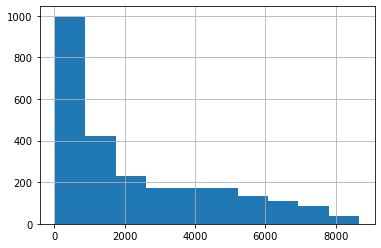

In [255]:


train.total_charges.hist()

In [256]:
observed=pd.crosstab(train.churn, train.total_charges)

In [257]:
observed

total_charges,18.85,19.10,19.20,19.25,19.30,19.45,19.50,19.55,19.65,19.75,19.80,19.85,19.90,19.95,20.00,20.05,20.15,20.20,20.25,20.30,20.35,20.40,20.45,20.50,20.55,...,7953.25,7968.85,8003.80,8013.55,8022.85,8035.95,8061.50,8071.05,8078.10,8100.25,8100.55,8124.20,8192.60,8277.05,8289.20,8310.55,8312.40,8332.15,8333.95,8337.45,8405.00,8424.90,8468.20,8477.60,8672.45
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,1,1,3,1,2,0,2,2,3,1,1,3,1,1,2,4,1,1,1,1,3,2,2,0,1,...,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Yes,0,0,0,1,2,1,0,0,0,1,1,0,3,0,1,1,2,5,0,1,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='churn', ylabel='count'>

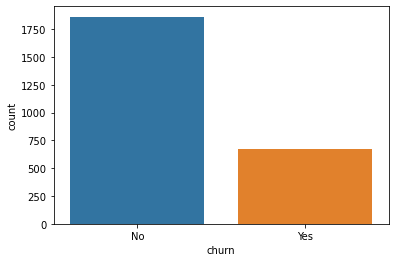

In [258]:
sns.countplot('churn', data=train)

In [259]:
train.isnull().sum()

paperless_billing                        0
gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
paperless_billing.1                      0
monthly_charges                          0
total_charges                            4
churn                                    0
gender_encoded                           0
partner_encoded                          0
dependents_encoded                       0
phone_service_encoded                    0
paperless_billing_encoded                0
churn_encoded                            0
multiple_lines_No phone service          0
multiple_lines_Yes                       0
online_security_No internet service      0
online_security_Yes                      0
online_backup_No internet service        0
online_backup_Yes                        0
device_prot

(array([565.,  69., 126., 229., 185., 337., 335., 293., 288., 108.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <BarContainer object of 10 artists>)

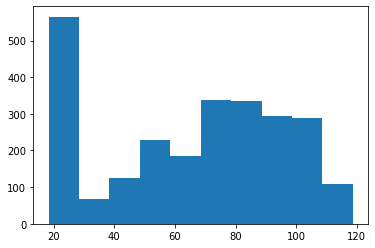

In [260]:
plt.hist(train.monthly_charges)

In [261]:
def num_distributions(train):
    for col in train.columns:
        if train[col].dtype != 'object':
            plt.hist(train[col])
            plt.title(f'Distribution of {col}')
            plt.show()

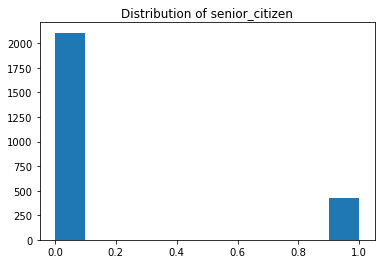

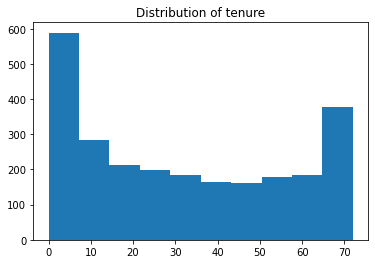

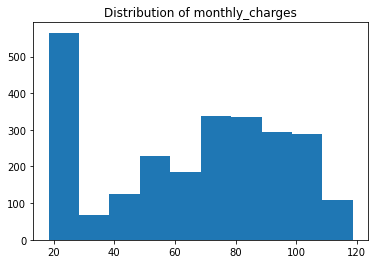

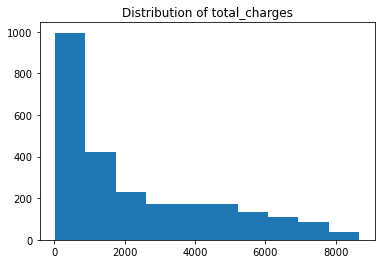

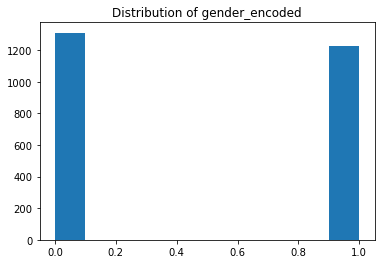

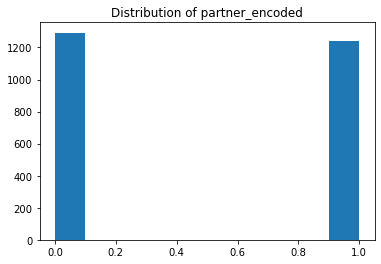

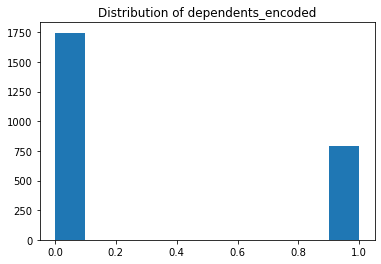

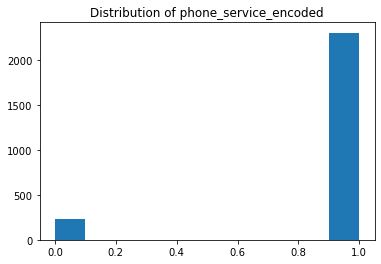

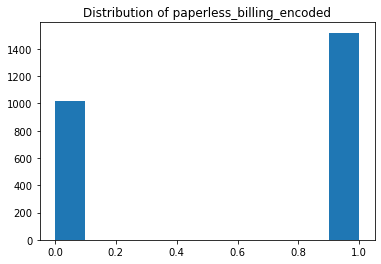

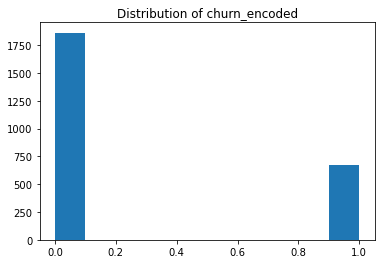

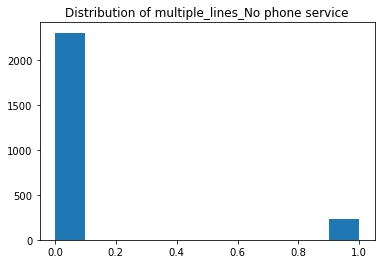

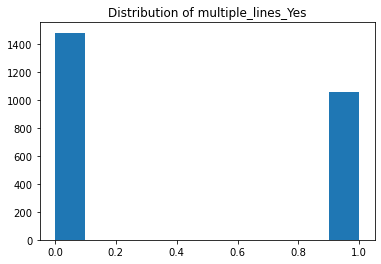

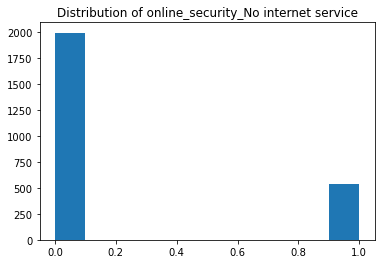

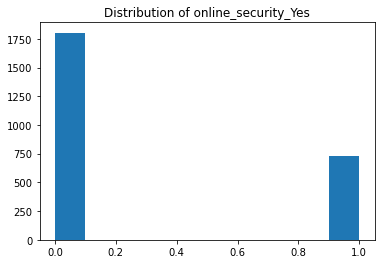

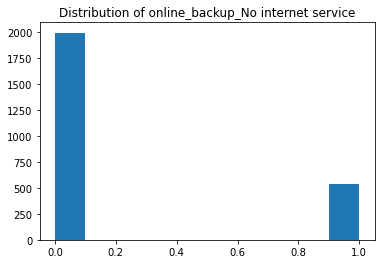

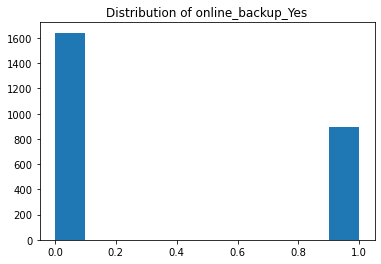

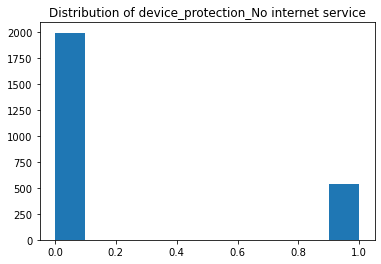

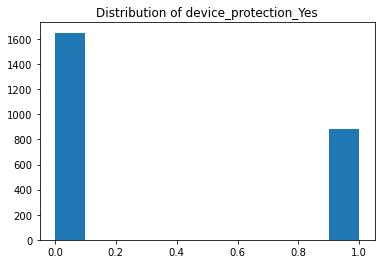

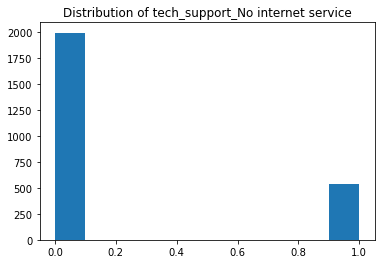

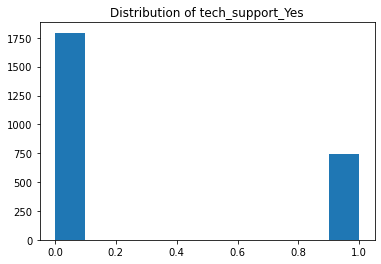

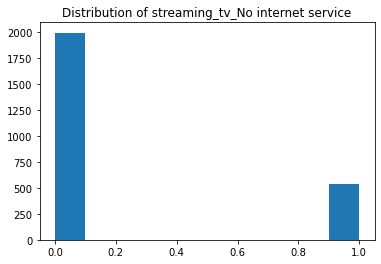

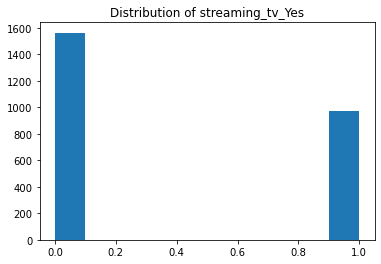

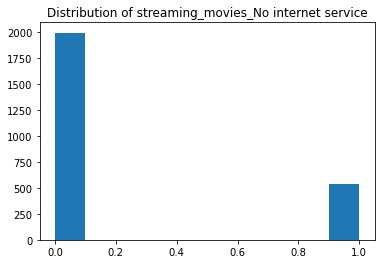

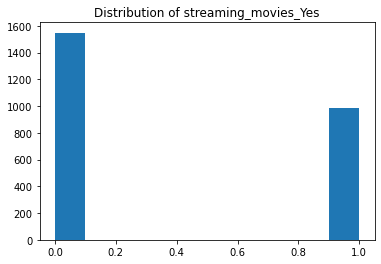

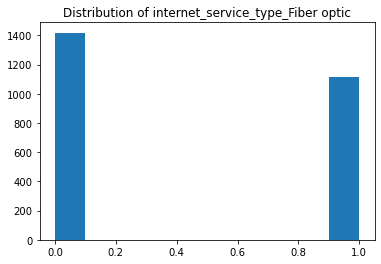

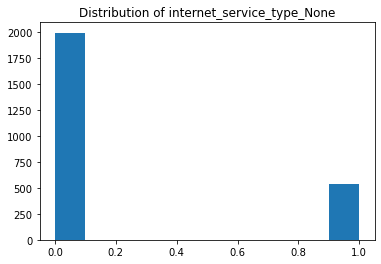

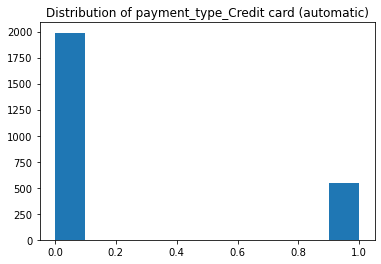

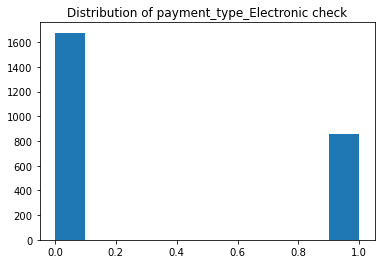

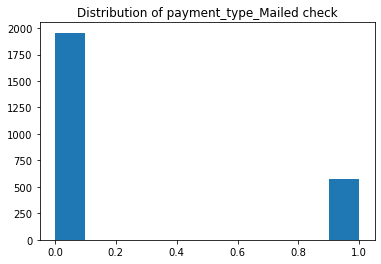

In [262]:
num_distributions(train)

In [263]:
df_churn=train[train['churn']=='Yes']


In [264]:
df_no_churn=train[train['churn']=='No']

In [265]:
df_churn.total_charges.mean(), df_no_churn.total_charges.mean()

(1623.1052748885602, 2516.958853606025)

In [266]:
df_churn.head()

,paperless_billing,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing.1,monthly_charges,total_charges,churn,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
1833,Yes,Female,0,No,No,6,Yes,Yes,91.10,455.30,Yes,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0
1908,No,Male,1,Yes,No,24,No,No,39.10,971.30,Yes,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
82,Yes,Female,0,No,No,2,Yes,Yes,86.25,181.65,Yes,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
5505,Yes,Female,0,No,No,60,Yes,Yes,105.90,6396.45,Yes,1,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0
3152,No,Female,0,Yes,No,59,Yes,No,101.10,6039.90,Yes,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0


In [267]:
pd.set_option('display.max_columns', 50)

In [268]:
df_churn.monthly_charges.mean(), df_no_churn.monthly_charges.mean()

(74.25928677563158, 61.69793233082708)

In [269]:
df_churn[df_churn['dependents']=='Yes'].mean()

senior_citizen                              0.066667
tenure                                     25.225000
monthly_charges                            75.836250
total_charges                            2184.606250
gender_encoded                              0.433333
partner_encoded                             0.766667
dependents_encoded                          1.000000
phone_service_encoded                       0.958333
paperless_billing_encoded                   0.708333
churn_encoded                               1.000000
multiple_lines_No phone service             0.041667
multiple_lines_Yes                          0.466667
online_security_No internet service         0.075000
online_security_Yes                         0.183333
online_backup_No internet service           0.075000
online_backup_Yes                           0.300000
device_protection_No internet service       0.075000
device_protection_Yes                       0.375000
tech_support_No internet service            0.

In [270]:
col_1=pd.DataFrame(df_churn.mean())
col_1.rename({0:'churn'}, axis=1, inplace=True)


In [271]:
col_1.head()

,churn
senior_citizen,0.231798
tenure,18.589896
monthly_charges,74.259287
total_charges,1623.105275
gender_encoded,0.476969


In [272]:
col_2=pd.DataFrame(df_no_churn.mean())
col_2.rename({0:'no_churn'}, axis=1, inplace=True)

In [273]:
diff_df=pd.concat([col_1, col_2], axis=1)



In [274]:
diff=diff_df.churn-diff_df.no_churn

In [275]:
diff_df=pd.concat([diff_df, diff], axis=True)
diff_df

,churn,no_churn,0
senior_citizen,0.231798,0.145542,0.086255
tenure,18.589896,36.624597,-18.034701
monthly_charges,74.259287,61.697932,12.561354
total_charges,1623.105275,2516.958854,-893.853579
gender_encoded,0.476969,0.484962,-0.007994
partner_encoded,0.352155,0.540279,-0.188125
dependents_encoded,0.178306,0.358754,-0.180448
phone_service_encoded,0.913819,0.905478,0.008341
paperless_billing_encoded,0.753343,0.542965,0.210379
churn_encoded,1.000000,0.000000,1.000000


In [276]:
diff_df.rename({0:'difference'}, axis=1, inplace=True)
diff_df.sort_values('difference')

,churn,no_churn,difference
total_charges,1623.105275,2516.958854,-893.853579
tenure,18.589896,36.624597,-18.034701
online_backup_No internet service,0.066865,0.266380,-0.199515
internet_service_type_None,0.066865,0.266380,-0.199515
streaming_movies_No internet service,0.066865,0.266380,-0.199515
streaming_tv_No internet service,0.066865,0.266380,-0.199515
tech_support_No internet service,0.066865,0.266380,-0.199515
device_protection_No internet service,0.066865,0.266380,-0.199515
online_security_No internet service,0.066865,0.266380,-0.199515
partner_encoded,0.352155,0.540279,-0.188125


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

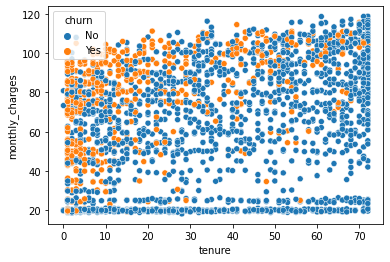

In [279]:
sns.scatterplot(data=train, y='monthly_charges', x='tenure', hue='churn')

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

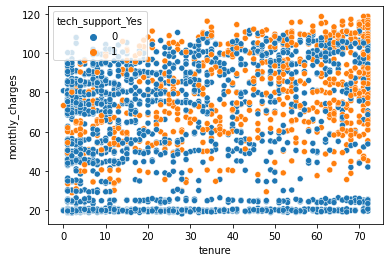

In [280]:
sns.scatterplot(data=train, y='monthly_charges', x='tenure', hue='tech_support_Yes')

In [282]:
train.columns

Index(['paperless_billing', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'paperless_billing.1',
       'monthly_charges', 'total_charges', 'churn', 'gender_encoded',
       'partner_encoded', 'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],
      d